In [68]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [69]:
movie_data = Path("Resources/mo_movies_data.csv")
movie_data_df = pd.read_csv(movie_data)
movie_data_df.head()

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0


In [70]:
movie_data_df.dtypes

Title           object
Year             int64
IMDB Rating    float64
IMDB Votes     float64
Genre           object
Box Office      object
IMDB ID         object
Budget           int64
Revenue        float64
dtype: object

In [71]:
movie_data_df['IMDB Rating'].max()


9.0

In [72]:
max_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 9.0]
max_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
555,The Dark Knight,2008,9.0,2896249.0,"Action, Crime, Drama","$534,987,076",tt0468569,185000000,1.004558e+09


In [73]:
movie_data_df['IMDB Rating'].min()


1.2

In [74]:
min_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 1.2]
min_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
2282,"Kidnapping, Caucasian Style",2014,1.2,604.0,Comedy,NaN,tt4537362,3500000,179000.0


In [75]:
movie_data_count = len(movie_data_df['Title'].unique())
movie_data_count

2316

In [76]:
average_rating = movie_data_df['IMDB Rating'].mean()
average_rating

6.403151986183075

In [77]:
year_agg = movie_data_df.groupby(['Year']).agg({'IMDB Rating': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

IMDB Rating                                     
            mean median       var       std       sem
Year                                                 
2005    6.354450   6.50  1.025020  1.012432  0.073257
2006    6.386321   6.50  1.058817  1.028988  0.070671
2007    6.506771   6.60  1.033933  1.016825  0.073383
2008    6.301932   6.40  1.204948  1.097701  0.076296
2009    6.417972   6.50  0.891296  0.944085  0.064089
2010    6.368996   6.40  0.887061  0.941839  0.062238
2011    6.327039   6.40  0.999654  0.999827  0.065501
2012    6.402913   6.45  1.011894  1.005929  0.070086
2013    6.512500   6.50  0.876345  0.936133  0.062548
2014    6.375962   6.40  1.111690  1.054367  0.073107
2015    6.491878   6.60  0.842179  0.917703  0.065384

In [78]:
ratings_percentiles = movie_data_df['IMDB Rating'].quantile([.1,.9])
lowerq = ratings_percentiles[.1]
upperq = ratings_percentiles[.9]

print(lowerq)
print(upperq)

5.2
7.6


(array([  4.,   5.,  19.,  46., 154., 366., 756., 650., 290.,  26.]),
 array([1.2 , 1.98, 2.76, 3.54, 4.32, 5.1 , 5.88, 6.66, 7.44, 8.22, 9.  ]),
 <BarContainer object of 10 artists>)

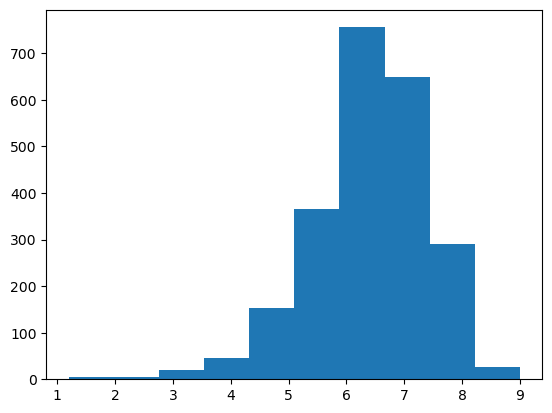

In [79]:
plt.hist(movie_data_df['IMDB Rating'])

In [80]:
size_bins = [0, 3, 4, 5, 6, 7, 8, 9]
labels = ["0-3", "3-5", "5", "6", "7", "8", "9-10"]

movie_data_df["Rating Scale"] = pd.cut(movie_data_df['IMDB Rating'], size_bins, labels=labels)
movie_data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,Rating Scale
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0,7
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0,5
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,8
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0,7
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0,6
...,...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",NaN,tt0453365,2196531,2411594.0,6
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",NaN,tt0479751,12000000,19000000.0,8
2313,Dikari,2006,6.5,693.0,Comedy,NaN,tt0933361,800000,1328612.0,7
2314,Pro lyuboff,2010,5.8,297.0,Drama,NaN,tt1718881,2000000,1268793.0,6


In [81]:
year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Budget': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

C:\Users\sgbri\AppData\Local\Temp\ipykernel_25536\3838499138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Budget': ['mean', 'median', 'var', 'std', 'sem']})


Budget                                          \
                      mean      median           var           std   
Rating Scale                                                         
0-3           1.755000e+07  17500000.0  2.394067e+14  1.547277e+07   
3-5           2.389848e+07  13400000.0  9.630221e+14  3.103260e+07   
5             2.622131e+07  18000000.0  7.023761e+14  2.650238e+07   
6             3.634428e+07  25000000.0  1.483059e+15  3.851051e+07   
7             3.864209e+07  20000000.0  2.305662e+15  4.801731e+07   
8             3.928369e+07  17000000.0  2.969432e+15  5.449249e+07   
9-10          4.927090e+07  15000000.0  4.384577e+15  6.621614e+07   

                            
                       sem  
Rating Scale                
0-3           3.868193e+06  
3-5           5.402082e+06  
5             2.200903e+06  
6             1.675955e+06  
7             1.526862e+06  
8             2.349338e+06  
9-10          8.089589e+06

In [82]:
year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Revenue': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

C:\Users\sgbri\AppData\Local\Temp\ipykernel_25536\3524987023.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Revenue': ['mean', 'median', 'var', 'std', 'sem']})


Revenue                                          \
                      mean      median           var           std   
Rating Scale                                                         
0-3           2.413450e+07   8356750.0  1.203462e+15  3.469095e+07   
3-5           3.986261e+07  15179302.0  4.074497e+15  6.383179e+07   
5             6.202502e+07  27105095.0  1.248594e+16  1.117405e+08   
6             7.700773e+07  36485929.0  1.383368e+16  1.176167e+08   
7             1.001499e+08  34854990.0  2.831462e+16  1.682695e+08   
8             1.501186e+08  47196625.5  7.678864e+16  2.771076e+08   
9-10          2.228181e+08  77208711.0  1.004522e+17  3.169419e+08   

                            
                       sem  
Rating Scale                
0-3           8.672737e+06  
3-5           1.111169e+07  
5             9.279544e+06  
6             5.118609e+06  
7             5.350658e+06  
8             1.194696e+07  
9-10          3.872062e+07

In [86]:
def line_reg(x_values, y_values, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x_values,regress_values,"r-")
    plt.ticklabel_format(useOffset = False, style='plain')
    plt.xticks(rotation = 45)
    print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.007212228236935369


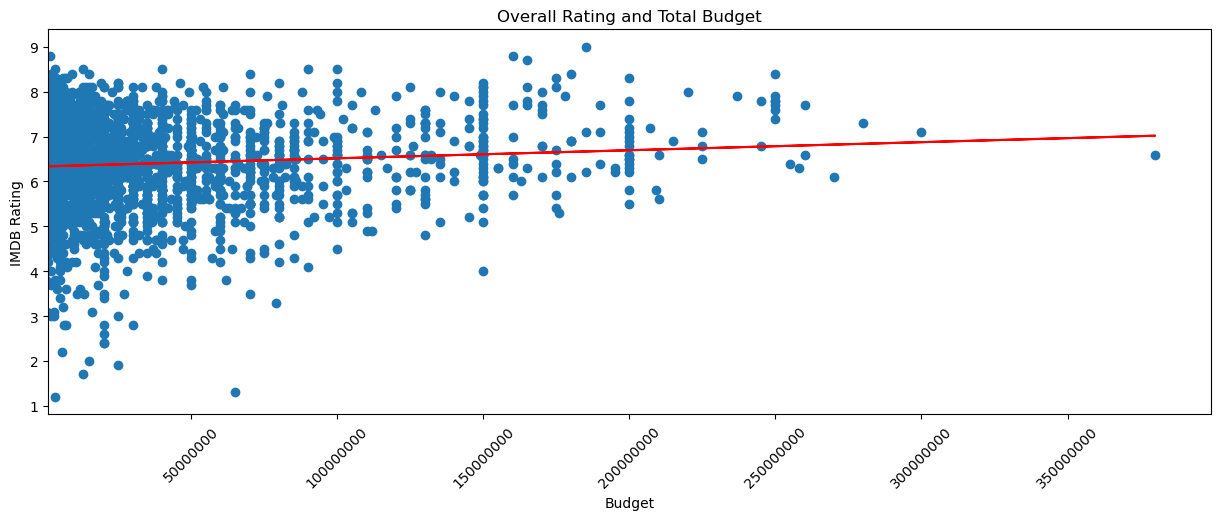

In [157]:

x_values = movie_data_df['Budget']
y_values = movie_data_df['IMDB Rating']
plt.figure(figsize=(15,5))
line_reg(x_values, y_values, 'Budget', 'IMDB Rating')
plt.xlim(1000000)
plt.title("Overall Rating and Total Budget")
plt.show()

The r-squared is: 0.03398518604361464


(0.0, 3000000000.0)

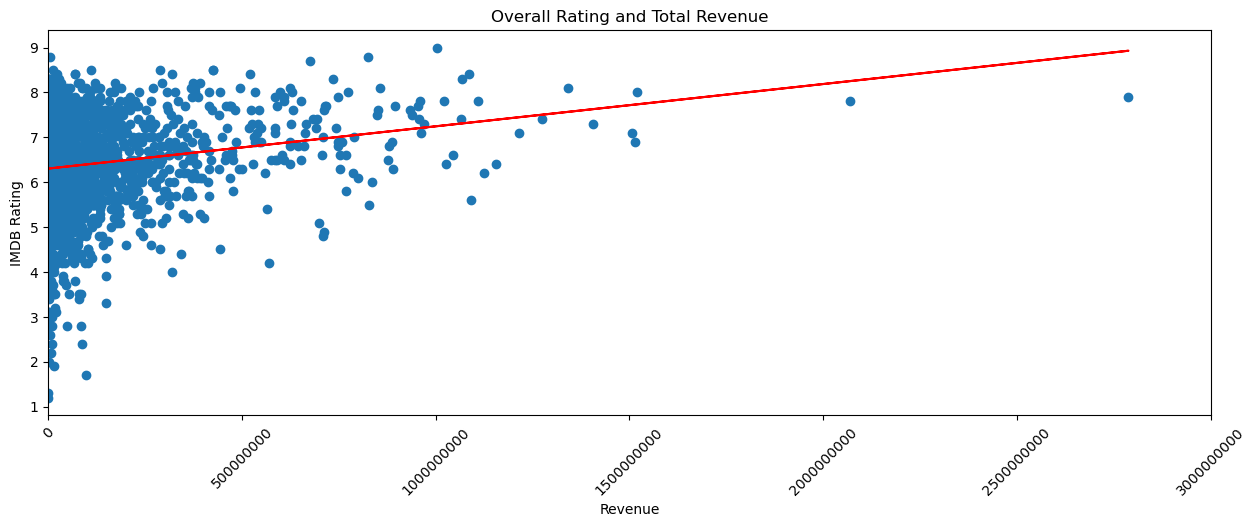

In [158]:
x_values = movie_data_df['Revenue']
y_values = movie_data_df['IMDB Rating']
plt.figure(figsize=(15,5))
line_reg(x_values, y_values, 'Revenue', 'IMDB Rating')
plt.title("Overall Rating and Total Revenue")
plt.xlim(0, 3000000000)


In [122]:
unique = list(movie_data_df["Genre"].unique())

genre_set = set()
for genres in unique:
    split = genres.replace(" ", "").split(",")
    genre_set.update(split)


genre_count = {k:[movie_data_df[movie_data_df["Genre"].str.contains(k)]["Title"].count(),\
                 movie_data_df[movie_data_df["Genre"].str.contains(k)]["IMDB Rating"].mean(),\
                 movie_data_df[movie_data_df["Genre"].str.contains(k)]["IMDB Votes"].sum()] for k in genre_set}
genre_count_df = pd.DataFrame(genre_count).T.rename(columns ={0:"count", 1:"Genre Rating", 2:"Genre Votes"})
genre_count_df

,count,Genre Rating,Genre Votes
Sport,45.0,6.548889,4658356.0
Documentary,33.0,6.960606,897367.0
Drama,1225.0,6.688735,155484897.0
Fantasy,185.0,6.082162,32832156.0
Romance,395.0,6.400506,37600416.0
Music,85.0,6.548235,6819152.0
War,46.0,6.863043,6089730.0
History,86.0,6.839535,7486626.0
Crime,427.0,6.524356,60101355.0
Adventure,486.0,6.365638,112160872.0


NameError: name 'tick_locations' is not defined

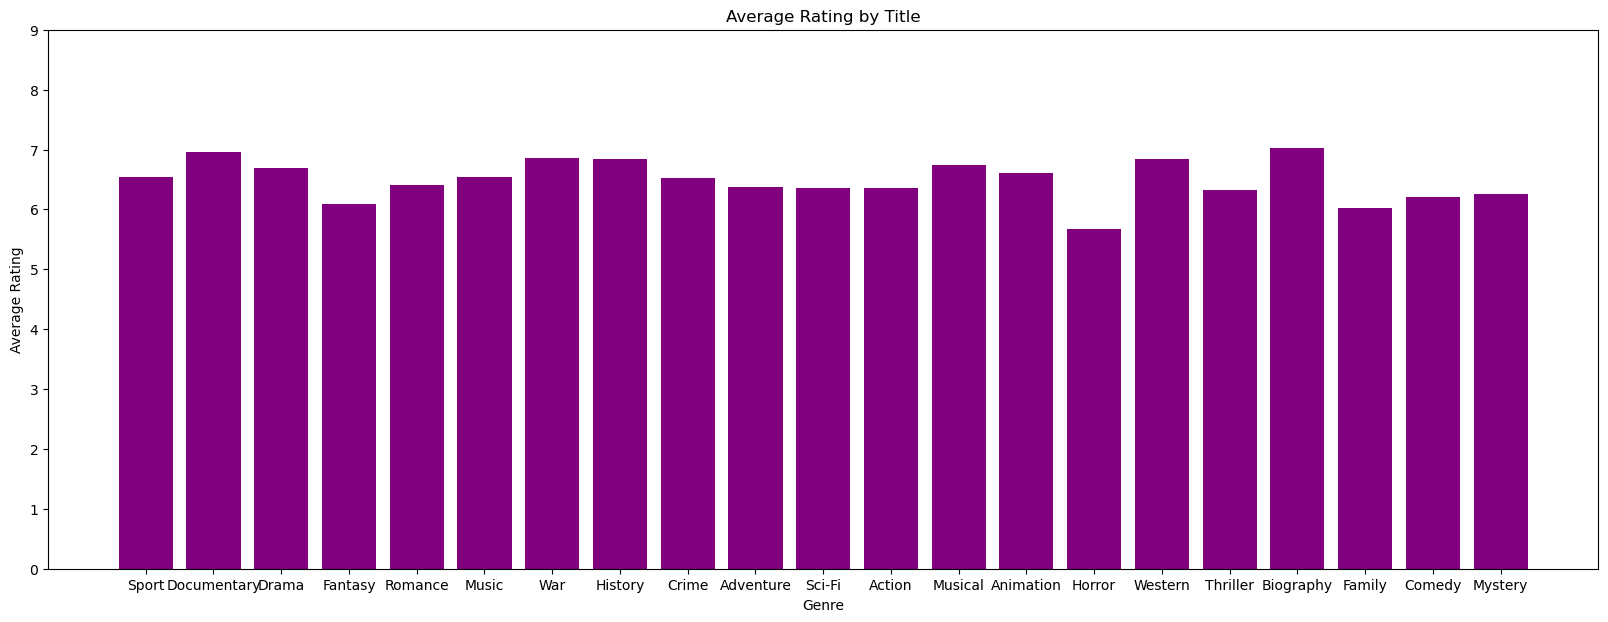

In [147]:
plt.figure(figsize=(20,7))
plt.ylim(0, 9)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Title")
plt.bar(genre_count_df.index, genre_count_df["Genre Rating"], color='purple', align="center")
plt.xticks(tick_locations, genre_count_df["Genre Rating"], rotation="vertical")
plt.show()

NameError: name 'tick_locations' is not defined

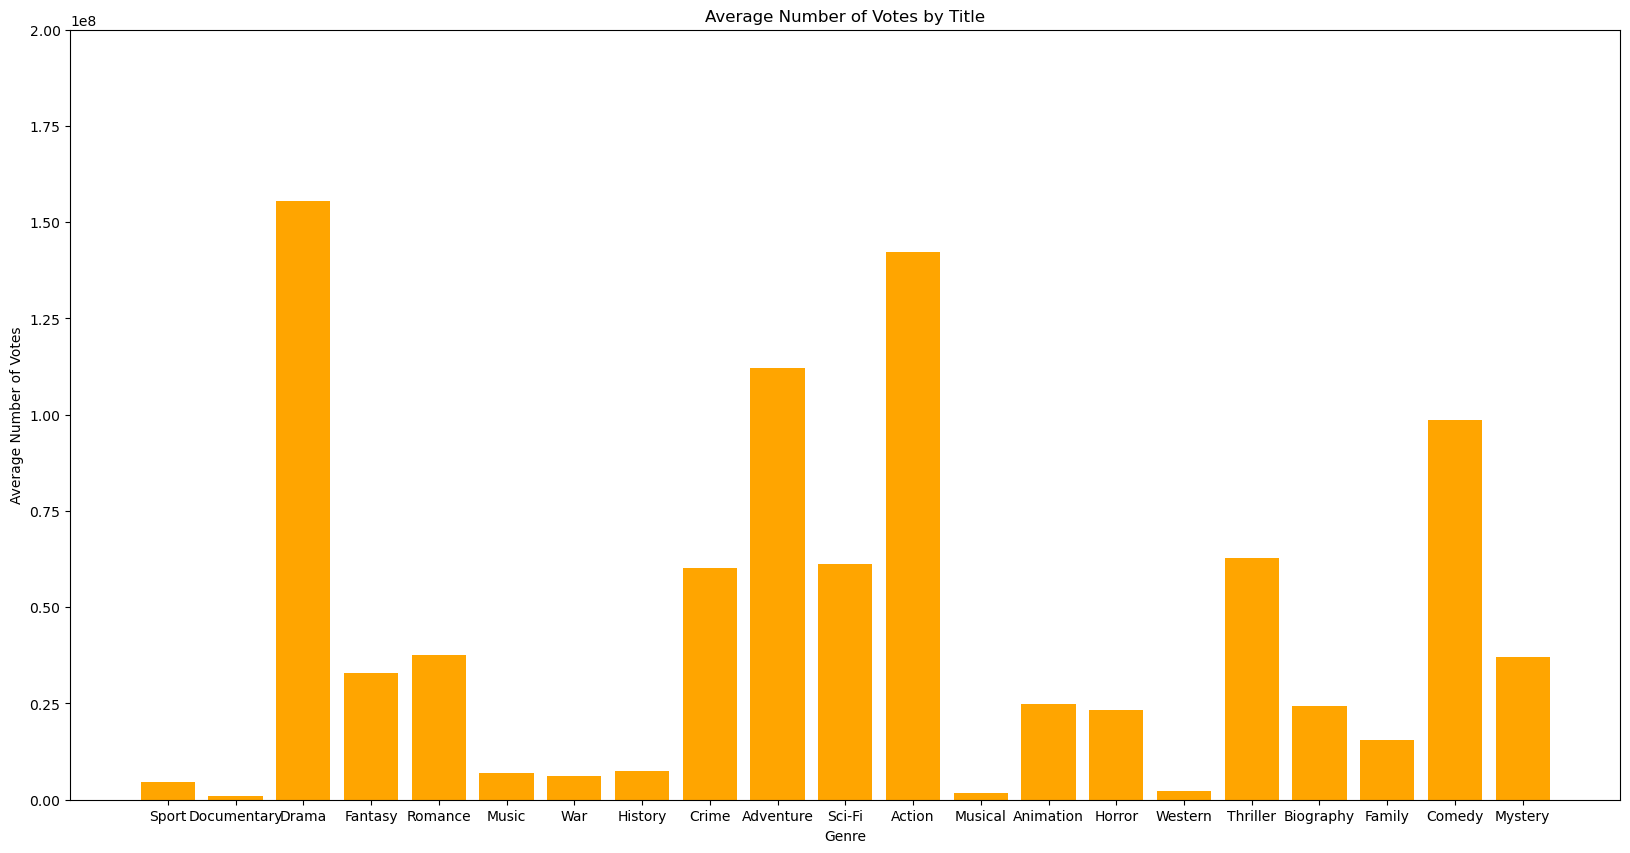

In [148]:
plt.figure(figsize=(20,10))
plt.ylim(0, 200000000)
plt.xlabel("Genre")
plt.ylabel("Average Number of Votes")
plt.title("Average Number of Votes by Title")
plt.bar(genre_count_df.index, genre_count_df["Genre Votes"], color='orange', align="center")
plt.xticks(tick_locations, genre_count_df["Genre Rating"], rotation="vertical")
plt.show()